# Classification Binaire avec Deep Learning

Ce notebook présente un exemple complet de classification binaire en utilisant un réseau de neurones profond.

## 1. Importation des bibliothèques

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## 2. Génération du jeu de données artificiel

Création d'un dataset pour classification binaire avec des caractéristiques pertinentes.

In [12]:
# Génération d'un jeu de données artificiel
np.random.seed(42)

# Créer un jeu de données avec 1000 échantillons et 20 features
X, y = make_classification(
    n_samples=2000,      # Nombre d'échantillons
    n_features=20,       # Nombre total de features
    n_informative=15,    # Nombre de features informatives
    n_redundant=5,       # Nombre de features redondantes
    n_classes=2,         # Classification binaire
    random_state=42,
    flip_y=0.1          # 10% de bruit dans les labels
)

print(f"Shape des données: {X.shape}")
print(f"Shape des labels: {y.shape}")
print(f"Distribution des classes: Classe 0: {sum(y==0)}, Classe 1: {sum(y==1)}")

Shape des données: (2000, 20)
Shape des labels: (2000,)
Distribution des classes: Classe 0: 1003, Classe 1: 997


## 3. Division des données

Séparation en ensembles d'entraînement, validation et test.

In [13]:
# Division des données en train/temp (70/30)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Division de temp en validation/test (50/50 du 30%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Taille ensemble d'entraînement: {X_train.shape}")
print(f"Taille ensemble de validation: {X_val.shape}")
print(f"Taille ensemble de test: {X_test.shape}")

Taille ensemble d'entraînement: (1400, 20)
Taille ensemble de validation: (300, 20)
Taille ensemble de test: (300, 20)


## 4. Normalisation des variables explicatives

Standardisation des features pour améliorer la convergence du réseau de neurones.

In [14]:
# Normalisation des données (fit sur train, transform sur tous les ensembles)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Normalisation effectuée avec succès!")
print(f"Moyenne des features après normalisation (train): {X_train_scaled.mean(axis=0).mean():.6f}")
print(f"Écart-type des features après normalisation (train): {X_train_scaled.std(axis=0).mean():.6f}")

Normalisation effectuée avec succès!
Moyenne des features après normalisation (train): 0.000000
Écart-type des features après normalisation (train): 1.000000


## 5. Construction du réseau de neurones profond

Création d'un réseau avec plusieurs couches cachées adaptées à la classification binaire.

In [15]:
from sklearn.neural_network import MLPClassifier

# Construction du réseau de neurones profond
# Architecture: Input(20) -> Dense(64) -> Dense(32) -> Dense(16) -> Output(1)
model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),  # 3 couches cachées
    activation='relu',                 # Fonction d'activation ReLU
    solver='adam',                     # Optimiseur Adam
    alpha=0.0001,                      # Régularisation L2
    batch_size=32,                     # Taille des batchs
    learning_rate='adaptive',          # Learning rate adaptatif
    learning_rate_init=0.001,          # Learning rate initial
    max_iter=100,                      # Nombre maximum d'itérations
    random_state=42,
    verbose=True,                      # Afficher la progression
    early_stopping=True,               # Arrêt anticipé
    validation_fraction=0.125,         # 10% des données pour validation interne
    n_iter_no_change=10               # Patience pour l'arrêt anticipé
)

print("Architecture du réseau de neurones:")
print("="*50)
print(f"Couche d'entrée: 20 features")
print(f"Couche cachée 1: 64 neurones (ReLU)")
print(f"Couche cachée 2: 32 neurones (ReLU)")
print(f"Couche cachée 3: 16 neurones (ReLU)")
print(f"Couche de sortie: 1 neurone (logistic)")
print("="*50)

Architecture du réseau de neurones:
Couche d'entrée: 20 features
Couche cachée 1: 64 neurones (ReLU)
Couche cachée 2: 32 neurones (ReLU)
Couche cachée 3: 16 neurones (ReLU)
Couche de sortie: 1 neurone (logistic)


## 6. Compilation du modèle

Configuration de la fonction de perte et de l'optimiseur pour la classification binaire.

In [16]:
# Avec MLPClassifier, la compilation se fait automatiquement
# Les paramètres ont déjà été définis lors de la création du modèle

print("Configuration du modèle:")
print("="*50)
print(f"Optimiseur: Adam (learning_rate=0.001)")
print(f"Fonction de perte: log_loss (binary cross-entropy)")
print(f"Régularisation: L2 (alpha=0.0001)")
print(f"Arrêt anticipé: Activé (patience=10)")
print("="*50)

Configuration du modèle:
Optimiseur: Adam (learning_rate=0.001)
Fonction de perte: log_loss (binary cross-entropy)
Régularisation: L2 (alpha=0.0001)
Arrêt anticipé: Activé (patience=10)


## 7. Entraînement du modèle

Entraînement avec observation de l'évolution sur l'ensemble de validation.

In [17]:
# Entraînement du modèle
# MLPClassifier utilise automatiquement X_val pour early stopping

model.fit(X_train_scaled, y_train)


Iteration 1, loss = 0.64800292
Validation score: 0.754286
Iteration 2, loss = 0.50874977
Validation score: 0.828571
Iteration 3, loss = 0.40769359
Validation score: 0.840000
Iteration 4, loss = 0.35064341
Validation score: 0.851429
Iteration 5, loss = 0.31205883
Validation score: 0.851429
Iteration 6, loss = 0.28315866
Validation score: 0.897143
Iteration 7, loss = 0.26030228
Validation score: 0.902857
Iteration 8, loss = 0.24402934
Validation score: 0.897143
Iteration 9, loss = 0.22384860
Validation score: 0.920000
Iteration 10, loss = 0.20895154
Validation score: 0.914286
Iteration 11, loss = 0.19681759
Validation score: 0.920000
Iteration 12, loss = 0.18734953
Validation score: 0.914286
Iteration 13, loss = 0.17915141
Validation score: 0.914286
Iteration 14, loss = 0.16956853
Validation score: 0.902857
Iteration 15, loss = 0.15993867
Validation score: 0.914286
Iteration 16, loss = 0.15396663
Validation score: 0.908571
Iteration 17, loss = 0.14663188
Validation score: 0.902857
Iterat

,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(64, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",32
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'adaptive'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",100
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42


## 8. Visualisation de l'évolution de l'entraînement

Graphiques de l'accuracy et de la perte sur les ensembles d'entraînement et validation.

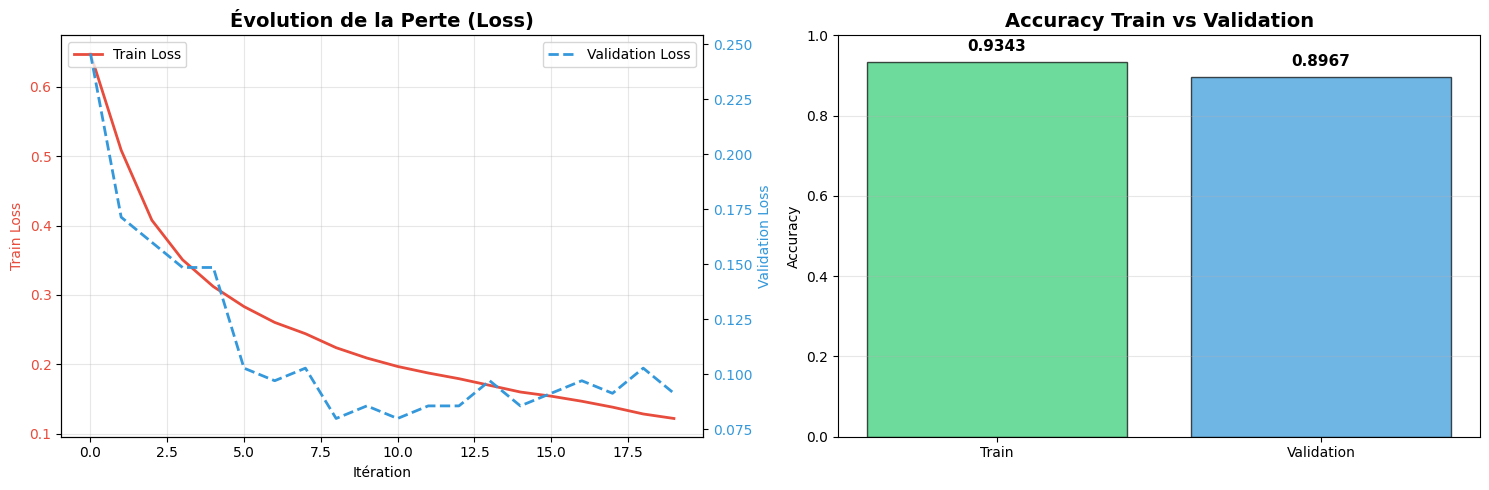

Accuracy d'entraînement: 0.9343
Accuracy de validation: 0.8967


In [18]:
# Visualisation des courbes d'apprentissage
from sklearn.metrics import log_loss

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique de la loss pendant l'entraînement avec validation
ax1 = axes[0]
ax1.plot(model.loss_curve_, label='Train Loss', linewidth=2, color='#e74c3c')

# Ajouter la courbe de validation score sur un axe secondaire
if hasattr(model, 'validation_scores_') and len(model.validation_scores_) > 0:
    ax2 = ax1.twinx()
    # Convertir les scores en "loss approximative" (1 - score) pour une visualisation cohérente
    validation_loss_approx = [1 - score for score in model.validation_scores_]
    ax2.plot(validation_loss_approx, label='Validation Loss', 
             linewidth=2, color='#3498db', linestyle='--')
    ax2.set_ylabel('Validation Loss', color='#3498db')
    ax2.tick_params(axis='y', labelcolor='#3498db')
    ax2.legend(loc='upper right')

ax1.set_title('Évolution de la Perte (Loss)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Itération')
ax1.set_ylabel('Train Loss', color='#e74c3c')
ax1.tick_params(axis='y', labelcolor='#e74c3c')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Graphique de l'accuracy sur les ensembles train et validation
train_accuracy = model.score(X_train_scaled, y_train)
val_accuracy = model.score(X_val_scaled, y_val)

datasets = ['Train', 'Validation']
accuracies = [train_accuracy, val_accuracy]
colors = ['#2ecc71', '#3498db']

axes[1].bar(datasets, accuracies, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_title('Accuracy Train vs Validation', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, (dataset, acc) in enumerate(zip(datasets, accuracies)):
    axes[1].text(i, acc + 0.02, f'{acc:.4f}', ha='center', va='bottom', 
                 fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"Accuracy d'entraînement: {train_accuracy:.4f}")
print(f"Accuracy de validation: {val_accuracy:.4f}")

## 9. Évaluation sur l'ensemble de test

Évaluation finale du modèle sur des données jamais vues.

In [19]:
# Évaluation sur l'ensemble de test
test_accuracy = model.score(X_test_scaled, y_test)

print("="*50)
print("ÉVALUATION FINALE SUR L'ENSEMBLE DE TEST")
print("="*50)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("="*50)

ÉVALUATION FINALE SUR L'ENSEMBLE DE TEST
Test Accuracy: 0.9000 (90.00%)


## 10. Interprétation de l'Accuracy

### Analyse des résultats

In [20]:
print("INTERPRÉTATION DE L'ACCURACY")
print("="*70)
print(f"\nAccuracy obtenue: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("\nSignification de l'accuracy:")
print(f"- Le modèle classifie correctement {test_accuracy*100:.2f}% des exemples du jeu de test")
print(f"- Taux d'erreur: {(1-test_accuracy)*100:.2f}%")
print()

# Interprétation contextuelle
if test_accuracy >= 0.95:
    interpretation = "EXCELLENT - Le modèle performe très bien sur ce problème"
elif test_accuracy >= 0.90:
    interpretation = "TRÈS BON - Performance solide avec marge d'amélioration"
elif test_accuracy >= 0.80:
    interpretation = "BON - Performance acceptable, peut être améliorée"
elif test_accuracy >= 0.70:
    interpretation = "MOYEN - Performance limitée, nécessite des améliorations"
else:
    interpretation = "FAIBLE - Le modèle nécessite des modifications importantes"

print(f"Évaluation: {interpretation}")
print("="*70)

INTERPRÉTATION DE L'ACCURACY

Accuracy obtenue: 0.9000 (90.00%)

Signification de l'accuracy:
- Le modèle classifie correctement 90.00% des exemples du jeu de test
- Taux d'erreur: 10.00%

Évaluation: TRÈS BON - Performance solide avec marge d'amélioration
